In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from atoms.hydrogen_psi import TrialPsi
from my_types.tensor_types import Position
from atoms.utils import show_density
from optimizers.optimizer import TrialPsiOptimizer
import torch

In [3]:
r_min: Position = torch.tensor([-1.0, -1.0, -1.0]).reshape(3, 1)
r_max: Position = torch.tensor([1.0, 1.0, 1.0]).reshape(3, 1)

In [4]:
t_psi = TrialPsi(r_min=r_min, r_max=r_max, num_walkers=100)

Running warmup steps


  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:00<00:00, 30325.62it/s]


Running steps


100%|██████████| 100000/100000 [00:03<00:00, 30741.60it/s]


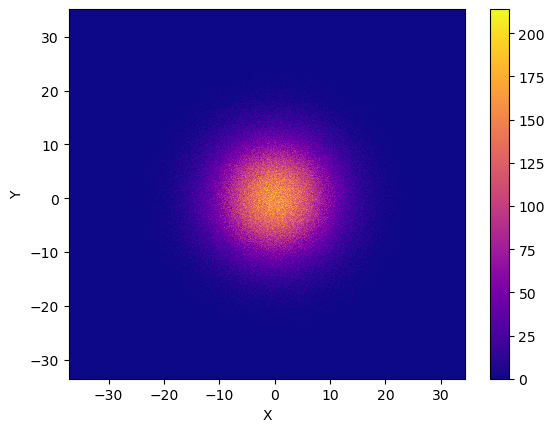

In [5]:
show_density(
    psi=t_psi,
    warmup_steps=20000,
    steps=100000,
    step_size=1,
    warmup_step_size=1,
    r_min=r_min,
    r_max=r_max,
    bins=1000,
)

In [6]:
tp = TrialPsi(r_min=r_min, r_max=r_max, num_walkers=100)
tp.theta

tensor([0.0042])

In [7]:
tp_opt = TrialPsiOptimizer(psi=tp, lr=20)
E_loc = tp_opt.optimize(num_opt_iters=100, num_warmup=1000, num_steps=1000, step_size=1)

  0%|          | 0/10 [00:00<?, ?it/s]

Energy: -0.1962 - Theta: 1.3490 - Grad: 0.0035: 100%|██████████| 10/10 [00:01<00:00,  9.85it/s]


In [8]:
tp.theta

tensor([1.3490])